In [461]:
import pandas as pd
import geopandas as gpd
from matplotlib import cm
from shapely.geometry import Point
from geopandas import GeoDataFrame
import seaborn as sns

df = pd.read_csv('../../data/DATA_2.csv', delimiter=',', parse_dates=['Datetime'])

In [462]:
df_geometry = df[["Latitude","Longitude"]]

In [463]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_geometry)
X = scaler.transform(df_geometry)

In [464]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

kmeans = KMeans(n_clusters=2, random_state=4,max_iter=3000)
kmeans.fit(X,sample_weight=(df.Magnitude))

df_geometry["group"]=kmeans.labels_

<ipython-input-464-71b344de7bc7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geometry["group"]=kmeans.labels_


In [465]:
((df.Magnitude-2.8)/2).pow(100).max()

1.3689147905858702e+43

In [466]:
df_map_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_map_mexico = df_map_world.loc[df_map_world.name == "Mexico",:]

In [467]:
seismic_geometry = [Point(lat,lng) for lat,lng in zip(df_geometry["Longitude"],df_geometry["Latitude"])]
gdf_seismic_geometry = GeoDataFrame(df_geometry, geometry=seismic_geometry)

<AxesSubplot:>

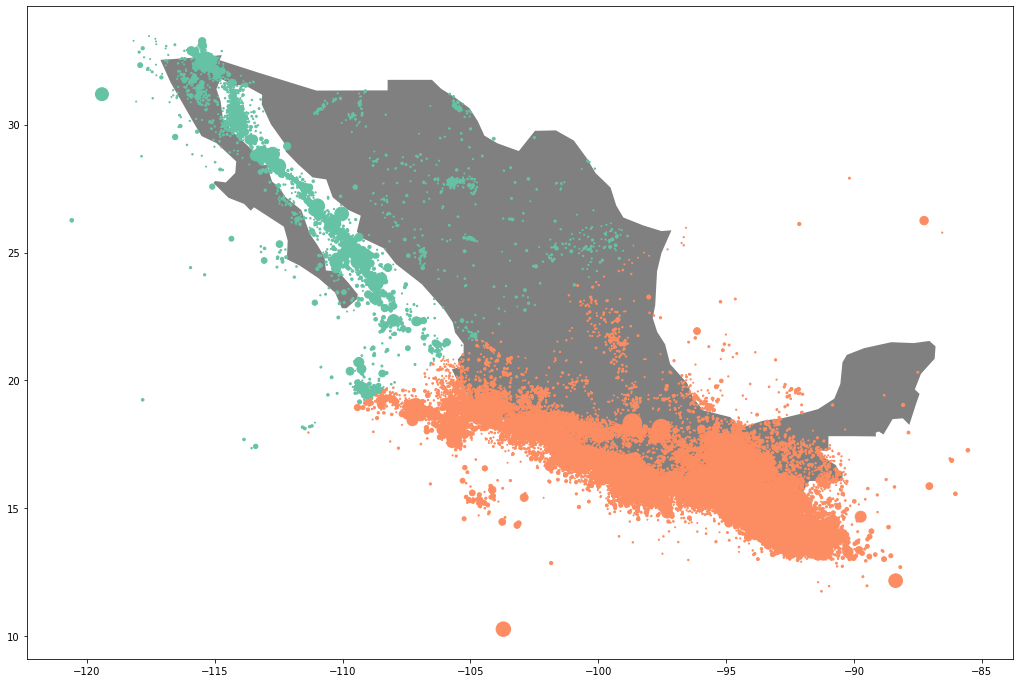

In [468]:
cmap = cm.get_cmap('Set2')
#
gdf_seismic_geometry.plot(ax=df_map_mexico.plot(figsize=(20, 12),color="grey"),color=df_geometry.group.map(cmap),markersize=(df.Magnitude-2.8).pow(4))